#Backorder Prediction project:
##Description:
###Problem Statement
In a supply chain system, Material backorder is a common problem, impacting an inventory system service level and effectiveness. Identifying parts with the highest chances of shortage prior to its occurrence can present a high opportunity to improve an overall company’s performance. In this project, we will train classifiers to predict future back-ordered products and generate predictions for a test set

###Data fields
#####. sku :
       sku code
#####. national_inv :
       Current inventory level of component
#####. lead_time :
       Transit time is the interval needed for a shipment to be delivered once it has been picked up from the point of departure.
#####. in_transit_qtry :
       Quantity in transit
#####. forecast_x_month :
      Forecast sales for the net 3, 6, 9 months
#####. sales_x_month :
      Sales quantity for the prior 1, 3, 6, 9 months
#####. min_bank :
    Minimum recommended amount in stock
#####. potential_issue :
      Indictor variable noting potential issue with item
#####. pieces_past_due :
     Parts overdue from source
#####. perf_x_months_avg :
     Source performance in the last 6 and 12 months
#####. local_bo_qty :
    Amount of stock orders overdue
#####. X17-X22 :
    General Risk Flags
#####. went_on_back_order :
    Product went on backorder
#####. Validation :
      indicator variable for training (0), validation (1), and test set (2)

####Load Data

In [ ]:
!gdown https://drive.google.com/uc?id=1GweUxUAZJhhUVgKHnhL0Hwd6qGZ25BCe
!gdown https://drive.google.com/uc?id=1HOSsnY0tUWlCjvIoxZPXkgx3J1tI_vgD

Downloading...
From (original): https://drive.google.com/uc?id=1GweUxUAZJhhUVgKHnhL0Hwd6qGZ25BCe
From (redirected): https://drive.google.com/uc?id=1GweUxUAZJhhUVgKHnhL0Hwd6qGZ25BCe&confirm=t&uuid=544e4630-1476-4cbb-8f45-272ff59edc01
To: /content/Kaggle_Training_Dataset_v2.csv
100% 123M/123M [00:06<00:00, 18.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1HOSsnY0tUWlCjvIoxZPXkgx3J1tI_vgD
To: /content/Kaggle_Test_Dataset_v2.csv
100% 17.6M/17.6M [00:00<00:00, 67.5MB/s]


In [ ]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from imblearn.under_sampling import RandomUnderSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:

import pandas as pd
import seaborn as sns
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt
import warnings
from sklearn.preprocessing import PowerTransformer
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report,ConfusionMatrixDisplay, \
                            precision_score, recall_score, f1_score, roc_auc_score,roc_curve,confusion_matrix

from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix
from sklearn import metrics
from sklearn.model_selection import  train_test_split, RepeatedStratifiedKFold, cross_val_score
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer, KNNImputer
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.compose import ColumnTransformer
from catboost import CatBoostClassifier

In [ ]:
train_data = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
test_data = pd.read_csv("Kaggle_Test_Dataset_v2.csv")

<ipython-input-5-38fe836a07b2>:1: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  train_data = pd.read_csv("Kaggle_Training_Dataset_v2.csv")
<ipython-input-5-38fe836a07b2>:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  test_data = pd.read_csv("Kaggle_Test_Dataset_v2.csv")


In [ ]:
train_data.head()

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
0,1026827,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,No,No,No,Yes,No,No
1,1043384,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.99,0.99,0.0,No,No,No,Yes,No,No
2,1043696,2.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No
3,1043852,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.10,0.13,0.0,No,No,No,Yes,No,No
4,1044048,8.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,-99.00,-99.00,0.0,Yes,No,No,Yes,No,No


In [ ]:
train_data.shape

(1687861, 23)

In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1687861 entries, 0 to 1687860
Data columns (total 23 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   sku                1687861 non-null  object 
 1   national_inv       1687860 non-null  float64
 2   lead_time          1586967 non-null  float64
 3   in_transit_qty     1687860 non-null  float64
 4   forecast_3_month   1687860 non-null  float64
 5   forecast_6_month   1687860 non-null  float64
 6   forecast_9_month   1687860 non-null  float64
 7   sales_1_month      1687860 non-null  float64
 8   sales_3_month      1687860 non-null  float64
 9   sales_6_month      1687860 non-null  float64
 10  sales_9_month      1687860 non-null  float64
 11  min_bank           1687860 non-null  float64
 12  potential_issue    1687860 non-null  object 
 13  pieces_past_due    1687860 non-null  float64
 14  perf_6_month_avg   1687860 non-null  float64
 15  perf_12_month_avg  1687860 non-n

In [ ]:
train_data.describe()

,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,sales_9_month,min_bank,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty
count,1.687860e+06,1.586967e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06,1.687860e+06
mean,4.961118e+02,7.872267e+00,4.405202e+01,1.781193e+02,3.449867e+02,5.063644e+02,5.592607e+01,1.750259e+02,3.417288e+02,5.252697e+02,5.277230e+01,2.043724e+00,-6.872059e+00,-6.437947e+00,6.264507e-01
std,2.961523e+04,7.056024e+00,1.342742e+03,5.026553e+03,9.795152e+03,1.437892e+04,1.928196e+03,5.192378e+03,9.613167e+03,1.483861e+04,1.254983e+03,2.360165e+02,2.655636e+01,2.584333e+01,3.372224e+01
min,-2.725600e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.900000e+01,-9.900000e+01,0.000000e+00
25%,4.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.300000e-01,6.600000e-01,0.000000e+00
50%,1.500000e+01,8.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,4.000000e+00,0.000000e+00,0.000000e+00,8.200000e-01,8.100000e-01,0.000000e+00
75%,8.000000e+01,9.000000e+00,0.000000e+00,4.000000e+00,1.200000e+01,2.000000e+01,4.000000e+00,1.500000e+01,3.100000e+01,4.700000e+01,3.000000e+00,0.000000e+00,9.700000e-01,9.500000e-01,0.000000e+00
max,1.233440e+07,5.200000e+01,4.894080e+05,1.427612e+06,2.461360e+06,3.777304e+06,7.417740e+05,1.105478e+06,2.146625e+06,3.205172e+06,3.133190e+05,1.464960e+05,1.000000e+00,1.000000e+00,1.253000e+04


In [ ]:
X_train = train_data.drop('went_on_backorder',axis=1)[:-1]
Y_train = train_data['went_on_backorder'][:-1]
X_test = test_data.drop('went_on_backorder',axis=1)[:-1]
Y_test = test_data['went_on_backorder'][:-1]

In [ ]:
X_cv, X_train, Y_cv, Y_train  = train_test_split(X_train, Y_train, test_size=0.2, random_state=42,stratify=Y_train)

In [ ]:

y_value_counts = Y_train.value_counts()
print("backorder  ", y_value_counts[1], ", (", (y_value_counts[1]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")
print("no backorder ", y_value_counts[0], ", (", (y_value_counts[0]/(y_value_counts[1]+y_value_counts[0]))*100,"%)")

backorder   2259 , ( 0.6691905726778288 %)
no backorder  335313 , ( 99.33080942732218 %)


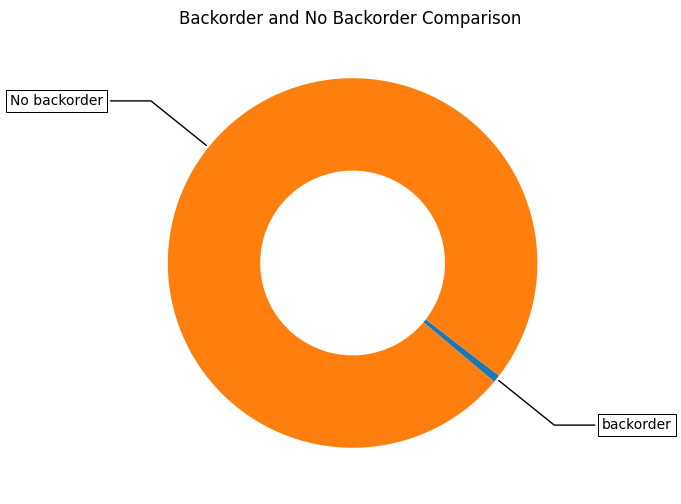

In [ ]:


fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))
recipe = ["backorder", "No backorder"]

data = [y_value_counts[1], y_value_counts[0]]

wedges, texts = ax.pie(data, wedgeprops=dict(width=0.5), startangle=-40)

bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(xycoords='data', textcoords='data', arrowprops=dict(arrowstyle="-"),
          bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
    ax.annotate(recipe[i], xy=(x, y), xytext=(1.35*np.sign(x), 1.4*y),
                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Backorder and No Backorder Comparison ")

plt.show()

In [ ]:
columns = X_train.columns

In [ ]:
categorical_features = [ feature for feature in columns if X_train[feature].dtype == 'O' ]
numerical_features = [ feature for feature in columns if feature not in categorical_features]

In [ ]:
#print columns
print('We have {} numerical features : {}'.format(len(numerical_features), numerical_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 15 numerical features : ['national_inv', 'lead_time', 'in_transit_qty', 'forecast_3_month', 'forecast_6_month', 'forecast_9_month', 'sales_1_month', 'sales_3_month', 'sales_6_month', 'sales_9_month', 'min_bank', 'pieces_past_due', 'perf_6_month_avg', 'perf_12_month_avg', 'local_bo_qty']

We have 7 categorical features : ['sku', 'potential_issue', 'deck_risk', 'oe_constraint', 'ppap_risk', 'stop_auto_buy', 'rev_stop']


In [ ]:
train_data.isnull().sum()
(train_data['lead_time'].isnull().sum()/train_data.shape[0])*100

5.977624934754698

In [ ]:
X_train['perf_6_month_avg'].value_counts()[-99]

129478

In [ ]:
X_train['perf_12_month_avg'].value_counts()[-99]

122050

In [ ]:
train_data[train_data['in_transit_qty'].isnull()]

,sku,national_inv,lead_time,in_transit_qty,forecast_3_month,forecast_6_month,forecast_9_month,sales_1_month,sales_3_month,sales_6_month,...,pieces_past_due,perf_6_month_avg,perf_12_month_avg,local_bo_qty,deck_risk,oe_constraint,ppap_risk,stop_auto_buy,rev_stop,went_on_backorder
1687860,(1687860 rows),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


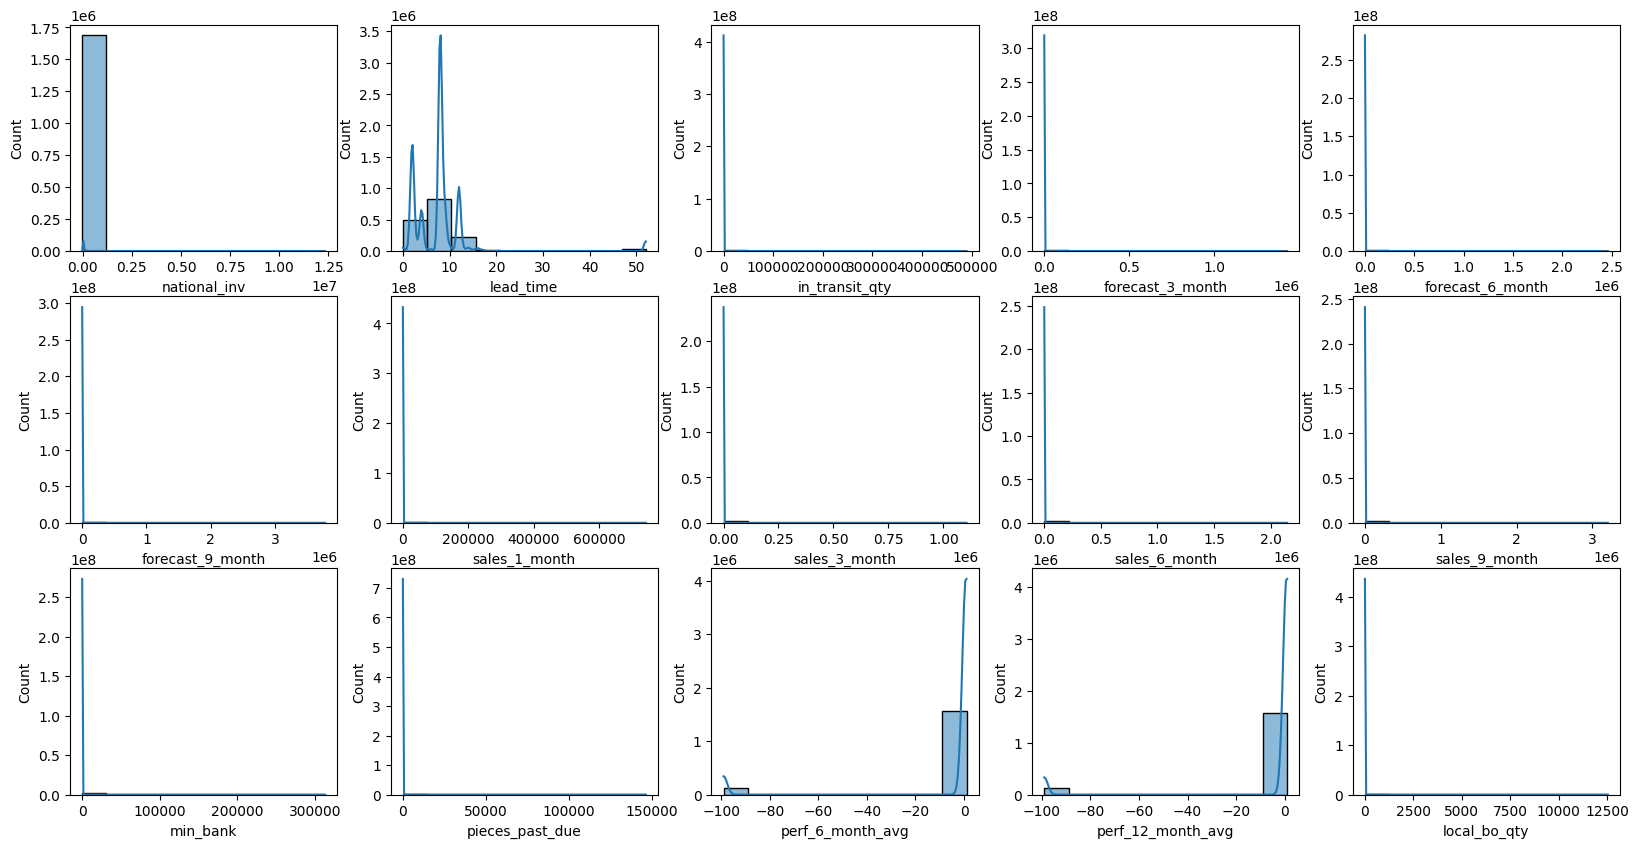

In [ ]:
numerical_features_len = len(numerical_features)
plt.figure(figsize=(20,10))
for i in range(numerical_features_len):
    plt.subplot(3,numerical_features_len//3,i+1)
    sns.histplot(train_data[numerical_features[i]],bins=10,kde=True)
plt.show()

In [ ]:
X_train[numerical_features].quantile(0.90)

national_inv         359.00
lead_time             12.00
in_transit_qty        16.00
forecast_3_month      83.00
forecast_6_month     176.00
forecast_9_month     261.00
sales_1_month         34.00
sales_3_month        114.00
sales_6_month        232.00
sales_9_month        355.00
min_bank              46.00
pieces_past_due        0.00
perf_6_month_avg       0.99
perf_12_month_avg      0.99
local_bo_qty           0.00
Name: 0.9, dtype: float64

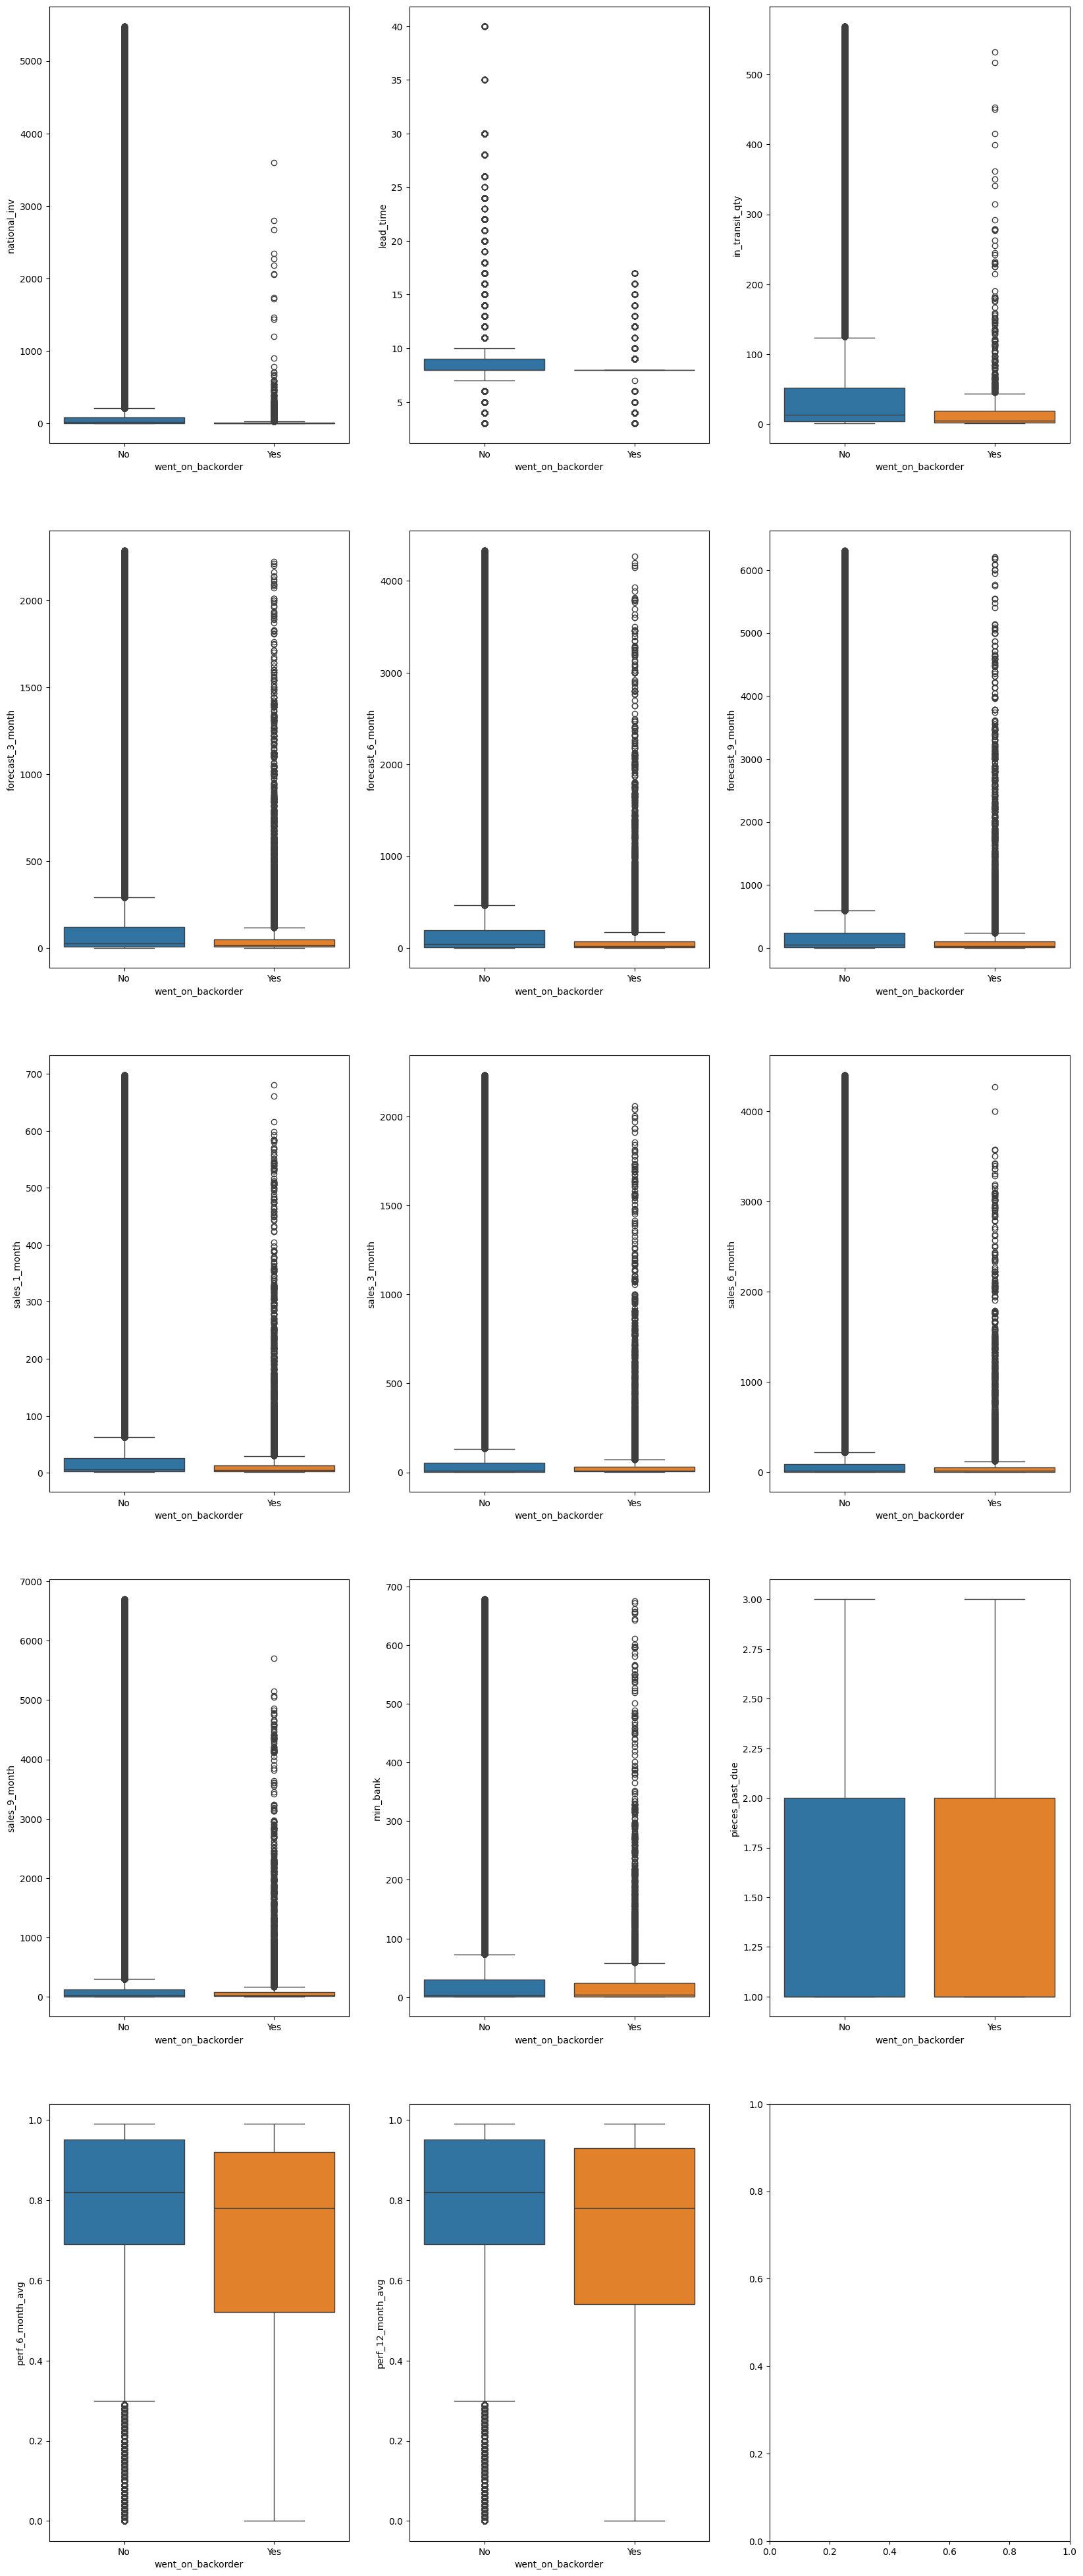

In [ ]:
numerical_features_len = len(numerical_features)
plt.figure(figsize=(20,50))

for i in range(numerical_features_len):

    #yes_data = train_data[train_data['went_on_backorder']=='Yes']
    #no_data = train_data[train_data['went_on_backorder']=='No']
    plt.subplot(5,numerical_features_len//5,i+1)
    sns.boxplot(train_data[(train_data[numerical_features[i]]<train_data[numerical_features[i]].quantile(.99)) & (train_data[numerical_features[i]]>train_data[numerical_features[i]].quantile(.010))],x='went_on_backorder',y=numerical_features[i],hue='went_on_backorder')
    #plt.boxplot(no_data[numerical_features[i]],labels='No')
plt.show()

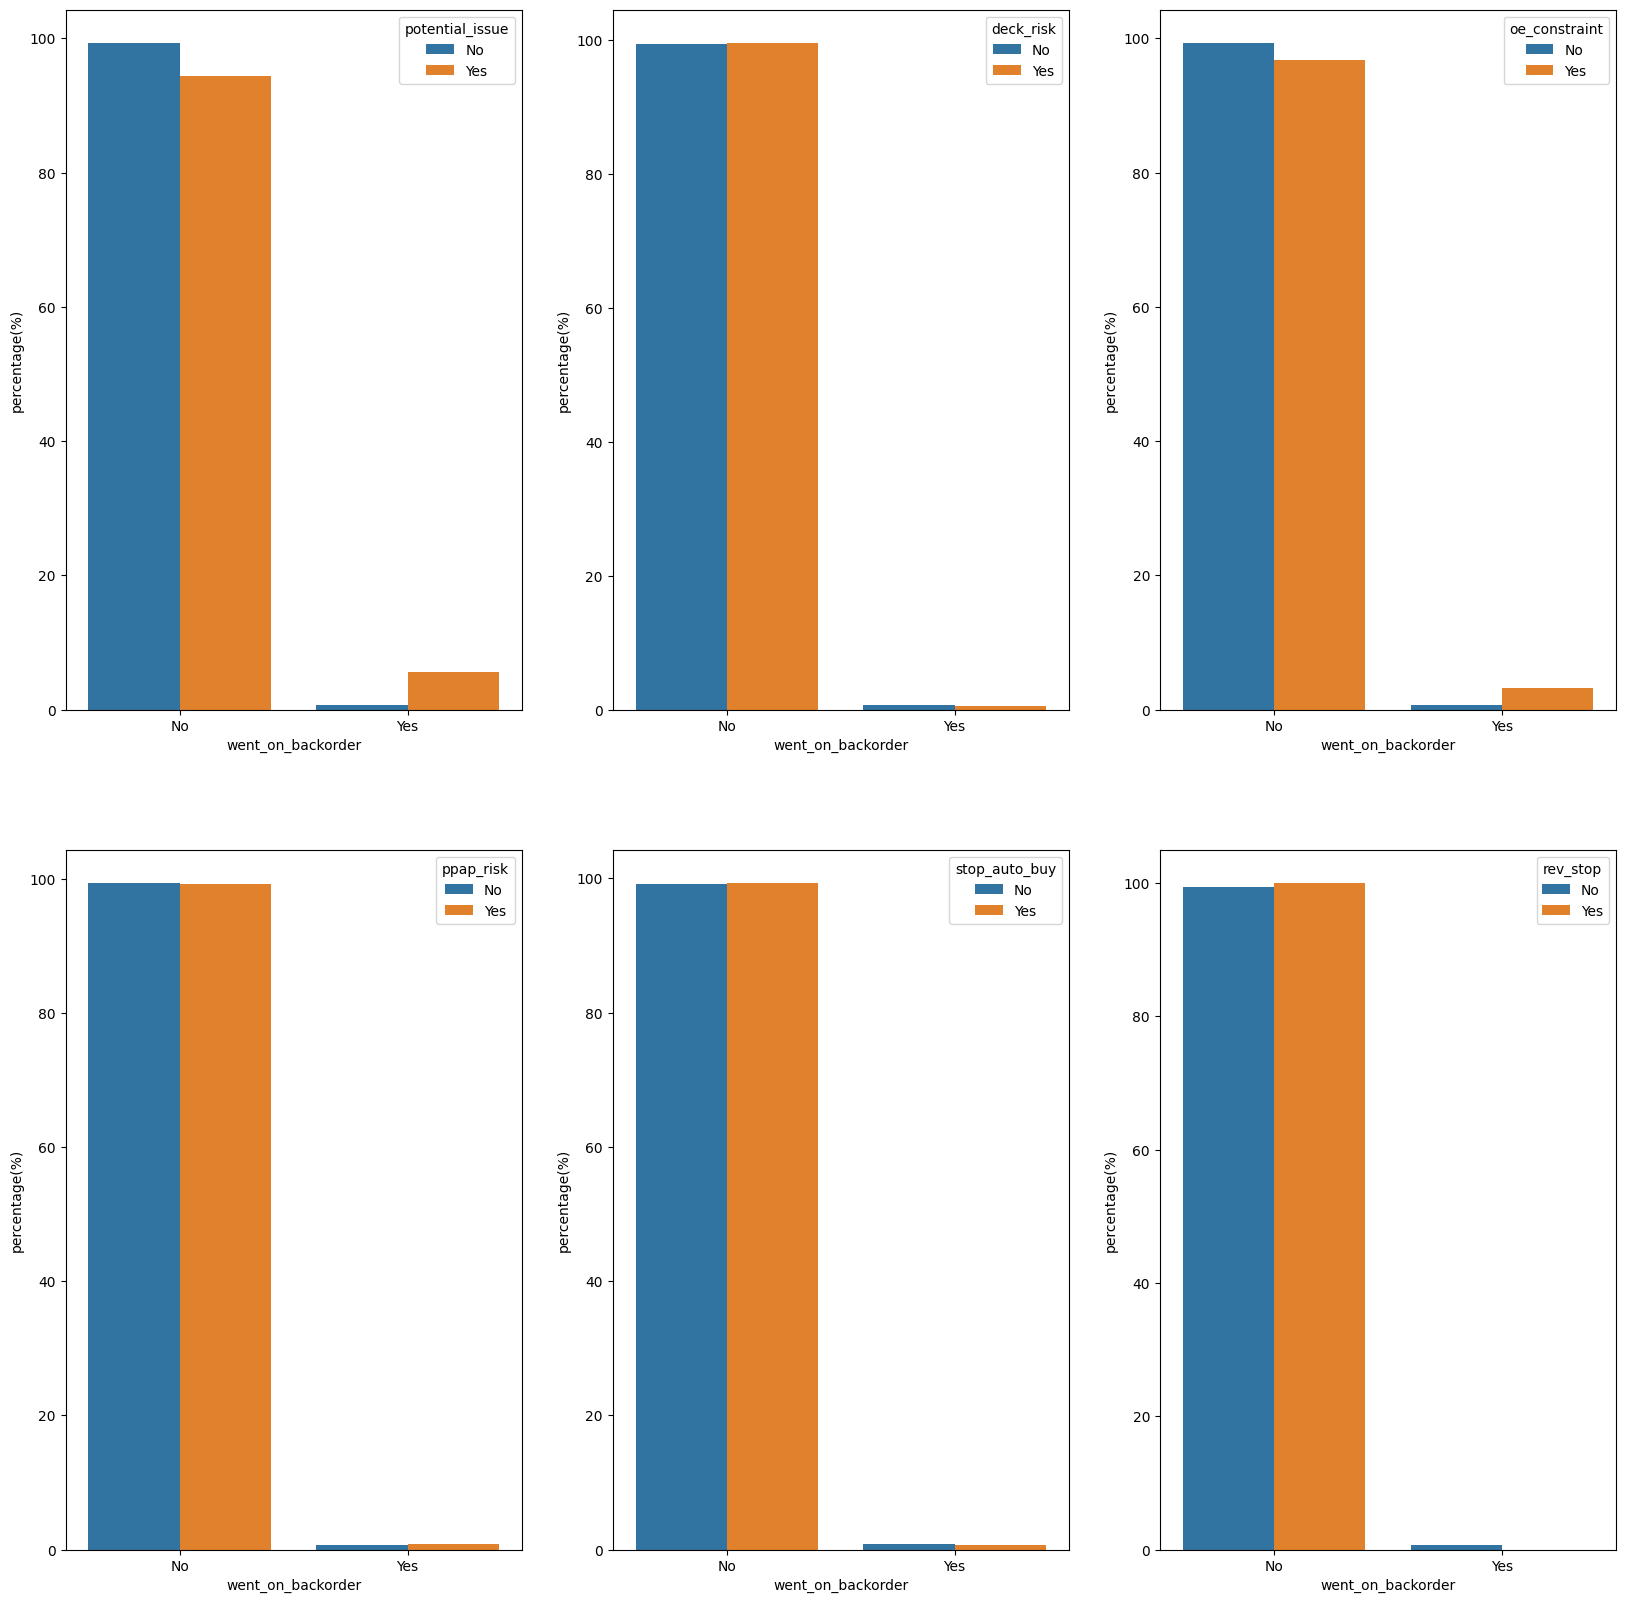

In [ ]:
categorical_features_len = len(categorical_features)
plt.figure(figsize=(20,20))

for i in range(1,categorical_features_len):
    temp1 = train_data.groupby([categorical_features[i],'went_on_backorder'])['went_on_backorder'].agg(total='count').reset_index()
    temp2 = train_data.groupby([categorical_features[i],'went_on_backorder'])[categorical_features[i]].count().groupby(level=0).agg(level1_sum='sum')
    temp = temp1.merge(temp2,how='inner',on=categorical_features[i])
    temp['percentage(%)']=(temp['total'])/(temp['level1_sum'])*100
    plt.subplot(2,categorical_features_len//2,i)
    sns.barplot(temp,x='went_on_backorder',y='percentage(%)',hue=categorical_features[i])
plt.show()

In [ ]:
data = train_data.sample(frac=.15, random_state=2)

In [ ]:
sns.pairplot(data,vars=numerical_features,hue='went_on_backorder')

In [ ]:
X_train = X_train.drop('sku',axis=1)
X_test = X_test.drop('sku',axis=1)

In [ ]:
Y_train = Y_train.map({'Yes':1,'No':0})
Y_test = Y_test.map({'Yes':1,'No':0})

In [ ]:

for feature in categorical_features:
    if feature == 'sku': continue
    X_train[feature] = X_train[feature].map({'Yes':1,'No':0})
    X_test[feature] = X_test[feature].map({'Yes':1,'No':0})
#X_train[categorical_features] = X_train[categorical_features].apply(lambda x: x.map({'Yes':1,'No':0}),axis=1)

In [ ]:
X_train['perf_6_month_avg'].replace({-99:np.nan},inplace=True)
X_train['perf_12_month_avg'].replace({-99:np.nan},inplace=True)
X_test['perf_6_month_avg'].replace({-99:np.nan},inplace=True)
X_test['perf_12_month_avg'].replace({-99:np.nan},inplace=True)

In [ ]:
under_sampler =RandomUnderSampler()
X_train,Y_train = under_sampler.fit_resample(X_train, Y_train)

In [ ]:
train = pd.concat((X_train,Y_train),axis=1)

In [ ]:
sns.pairplot(train,vars=numerical_features,hue='went_on_backorder')

##Create Functions for model training and evaluation

In [ ]:

def evaluate_clf(true, predicted):
    '''
    This function takes in true values and predicted values
    Returns: Accuracy, F1-Score, Precision, Recall, Roc-auc Score
    '''
    accuracy = accuracy_score(true, predicted) # Calculate Accuracy
    f1 = f1_score(true, predicted) # Calculate F1-score
    precision = precision_score(true, predicted) # Calculate Precision
    recall = recall_score(true, predicted)  # Calculate Recall
    roc_auc = roc_auc_score(true, predicted) #Calculate Roc
    return accuracy, f1 , precision, recall, roc_auc

In [ ]:

# Create a function which can evaluate models and return a report
def evaluate_models(X_train, y_train, X_test, y_test, models):
    '''
    This function takes in X and y and models dictionary as input
    It splits the data into Train Test split
    Iterates through the given model dictionary and evaluates the metrics
    Returns: Dataframe which contains report of all models metrics with cost
    '''

    #cost_list=[]
    models_list = []
    accuracy_list = []

    for model in models:
        model = models[model]['model'](**models[model]['best_params'])
        model.fit(X_train, y_train) # Train model

        # Make predictions
        y_train_pred = model.predict(X_train)
        y_test_pred = model.predict(X_test)

        # Training set performance
        model_train_accuracy, model_train_f1,model_train_precision,\
        model_train_recall,model_train_rocauc_score=evaluate_clf(y_train ,y_train_pred)
        #train_cost = total_cost(y_train, y_train_pred)


        # Test set performance
        model_test_accuracy,model_test_f1,model_test_precision,\
        model_test_recall,model_test_rocauc_score=evaluate_clf(y_test, y_test_pred)
        confusion_mat = confusion_matrix(y_test,y_test_pred,labels=model.classes_)
        #test_cost = total_cost(y_test, y_test_pred)

        print(model)
        #models_list.append(list(models.keys())[i])

        print('Model performance for Training set')
        print("- Accuracy: {:.4f}".format(model_train_accuracy))
        print('- F1 score: {:.4f}'.format(model_train_f1))
        print('- Precision: {:.4f}'.format(model_train_precision))
        print('- Recall: {:.4f}'.format(model_train_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_train_rocauc_score))
        #print(f'- COST: {train_cost}.')

        print('----------------------------------')

        print('Model performance for Test set')
        print('- Accuracy: {:.4f}'.format(model_test_accuracy))
        print('- F1 score: {:.4f}'.format(model_test_f1))
        print('- Precision: {:.4f}'.format(model_test_precision))
        print('- Recall: {:.4f}'.format(model_test_recall))
        print('- Roc Auc Score: {:.4f}'.format(model_test_rocauc_score))
        #print(f'- COST: {test_cost}.')
        #cost_list.append(test_cost)
        print('='*35)
        print('\n')

        #plots Confusion matrix
        disp = ConfusionMatrixDisplay(confusion_matrix=confusion_mat, display_labels=model.classes_)
        disp.plot()
        plt.show()
        #report=pd.DataFrame(list(zip(models_list, cost_list)), columns=['Model Name', 'Cost']).sort_values(by=["Cost"])

        #return report

##Evaluate Model on Different experiments

In [ ]:

from sklearn.model_selection import RandomizedSearchCV
def perform_grid_search(model, param_grid, X_train, y_train, cv=5, scoring='roc_auc'):
    """
    Perform GridSearchCV to find the best hyperparameters for a given model.

    Parameters:
    model : estimator object
        The machine learning model (e.g., RandomForestClassifier()).
    param_grid : dict or list of dictionaries
        Dictionary with parameters names (str) as keys and lists of parameter settings to try as values.
    X_train : array-like
        Training data features.
    y_train : array-like
        Training data labels.
    cv : int, cross-validation generator or an iterable, default=5
        Determines the cross-validation splitting strategy.
    scoring : str, callable, list/tuple, or dict, default='accuracy'
        Strategy to evaluate the performance of the cross-validated model on the test set.

    Returns:
    best_model : estimator object
        The model with the best found hyperparameters.
    grid_search : GridSearchCV object
        The GridSearchCV object after fitting.
    """
    grid_search = RandomizedSearchCV(estimator=model, param_grid=param_grid, cv=cv, scoring=scoring)
    grid_search.fit(X_train, y_train)
    best_parameters = grid_search.best_params_
    return best_parameters

In [ ]:

from random import uniform
#Dictionary which contains models for experiment
models = {
    "Random Forest": {"model": RandomForestClassifier,
                      "params":{
                                'n_estimators': range(10, 101),
                                'criterion': ['gini', 'entropy'],
                                'max_depth': range(2, 51),
                                'min_samples_split': range(2, 11),
                                'min_samples_leaf': range(1, 11),
                                'max_features': ['sqrt', 'log2', None],
                                'bootstrap': [True, False]
                                },
                      "best_params":{}},


    "Logistic Regression": {"model": LogisticRegression,
                            "params":{
                                      'C': uniform(0.1, 10),  # Example range for C
                                      'solver': ['liblinear', 'lbfgs', 'newton-cg', 'saga'],
                                      'penalty': ['l1', 'l2'] },
                            "best_params":{}},

    "XGBClassifier":{"model":XGBClassifier,
                     "params":{
                               'n_estimators': np.arange(50, 501, 50),
                               'max_depth': np.arange(3, 16, 1),
                               'learning_rate': np.linspace(0.01, 0.3, 30),
                               'subsample': np.linspace(0.5, 1, 6),
                               'colsample_bytree': np.linspace(0.3, 1, 8),
                               'gamma': np.linspace(0, 0.5, 6),
                                },
                     "best_params":{}},

    "CatBoosting Classifier":{"model":CatBoostClassifier,
                               "params":{
                                        'iterations': np.arange(50, 501, 50),
                                        'depth': np.arange(3, 16, 1),
                                        'learning_rate': np.linspace(0.01, 0.3, 30),
                                        'l2_leaf_reg': np.linspace(1, 10, 10),
                                        'bagging_temperature': np.linspace(0, 1, 11),
                                        'border_count': np.arange(32, 256, 32),
                                        'scale_pos_weight': np.linspace(1, 10, 10)
},
                               "best_params":{}},


    "BalancedbaggingClassifier":{"model":BalancedBaggingClassifier,
                                 "params":{
                                           'n_estimators': np.arange(10, 1201, 30),
                                           'max_samples': np.linspace(0.5, 1, 10),
                                           'max_features': np.linspace(0.5, 1, 10),
                                           'bootstrap': [True, False],
                                           'bootstrap_features': [True, False]},
                                 "best_params":{}}
}

####Experiment: 1 = KNN Imputer for Null values with SMOTE for imbalanced dataset

In [ ]:

# Fit with robust scaler for KNN best K-selection experminet
#robustscaler = RobustScaler()
#X1 = robustscaler.fit_transform(X_train)

In [ ]:

#results=[]
# define imputer
#imputer = KNNImputer(n_neighbors=2, weights='uniform', metric='nan_euclidean')
#strategies = [str(i) for i in [1,2,3]]
#for s in strategies:
    #pipeline = Pipeline(steps=[('i', KNNImputer(n_neighbors=int(s))), ('m', LogisticRegression())])
    #scores = cross_val_score(pipeline, X1, Y_train, scoring='accuracy', cv=2, n_jobs=-1)
    #results.append(scores)
    #print('n_neighbors= %s || accuracy (%.4f)' % (s , mean(scores)))

In [ ]:

# Fit the KNN imputer with selected K-value
knn_pipeline = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=1)),
    ('RobustScaler', RobustScaler())
])

In [ ]:
X_train_knn =knn_pipeline.fit_transform(X_train)
X_test_knn = knn_pipeline.transform(X_test)

In [ ]:
X_train_knn. to_csv('X_train_knn. csv', index=False)
X_test_knn. to_csv('X_test_knn. csv', index=False)

In [ ]:
from imblearn.combine import SMOTE

# Resampling the minority class. The strategy can be changed as required.
smt = SMOTE(random_state=42,sampling_strategy='minority',n_jobs=-1)
# Fit the model to generate the data.
X_train_knn_smote, Y_train_knn_smote = smt.fit_resample(X_train_knn, Y_train)

/usr/local/lib/python3.10/dist-packages/imblearn/over_sampling/_smote/base.py:336: FutureWarning: The parameter `n_jobs` has been deprecated in 0.10 and will be removed in 0.12. You can pass an nearest neighbors estimator where `n_jobs` is already set instead.
  warnings.warn(


In [ ]:
for model in models:
    print(model)
    X = X_train_knn_smote
    Y = Y_train_knn_smote
    if model == 'BalancedbaggingClassifier':
        X = X_train_knn
        Y = Y_train
    models[model]['best_params'] = perform_grid_search(models[model]['model'](), models[model]['params'], X, Y)
    print(models[model]['best_params'])

In [ ]:
!pip install funcy  # Install funcy if not already installed

Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9996
- Recall: 0.9958
- Roc Auc Score: 0.9977
----------------------------------
Model performance for Test set
- Accuracy: 0.9878
- F1 score: 0.1848
- Precision: 0.3603
- Recall: 0.1243
- Roc Auc Score: 0.5609




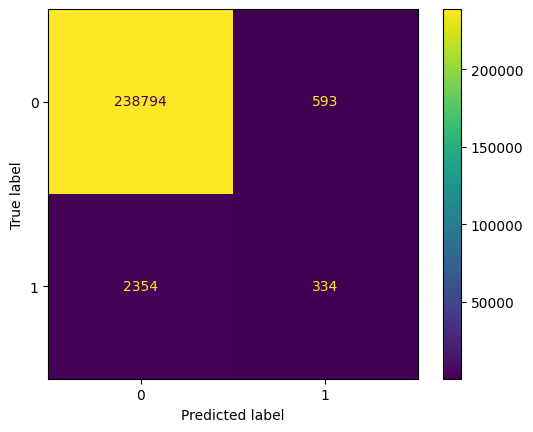

Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9996
- Recall: 0.9957
- Roc Auc Score: 0.9977
----------------------------------
Model performance for Test set
- Accuracy: 0.9819
- F1 score: 0.1564
- Precision: 0.1618
- Recall: 0.1514
- Roc Auc Score: 0.5713




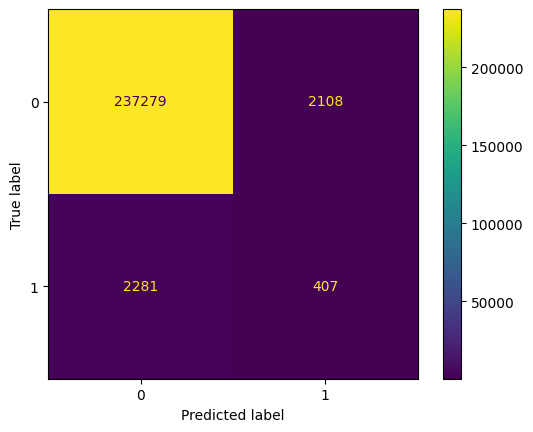

Gradient Boosting
Model performance for Training set
- Accuracy: 0.9322
- F1 score: 0.9328
- Precision: 0.9239
- Recall: 0.9419
- Roc Auc Score: 0.9322
----------------------------------
Model performance for Test set
- Accuracy: 0.9263
- F1 score: 0.1779
- Precision: 0.1015
- Recall: 0.7180
- Roc Auc Score: 0.8233




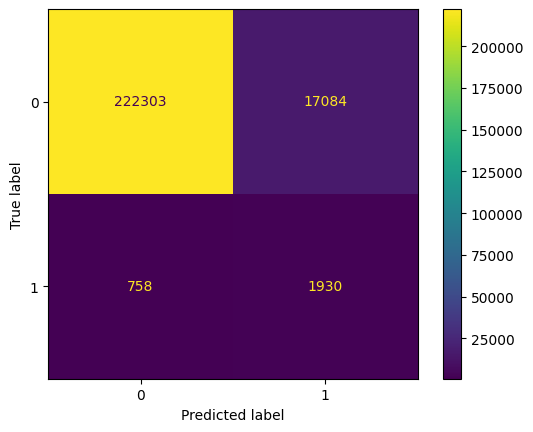

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.7273
- F1 score: 0.7551
- Precision: 0.6852
- Recall: 0.8410
- Roc Auc Score: 0.7273
----------------------------------
Model performance for Test set
- Accuracy: 0.6150
- F1 score: 0.0433
- Precision: 0.0223
- Recall: 0.7850
- Roc Auc Score: 0.6991




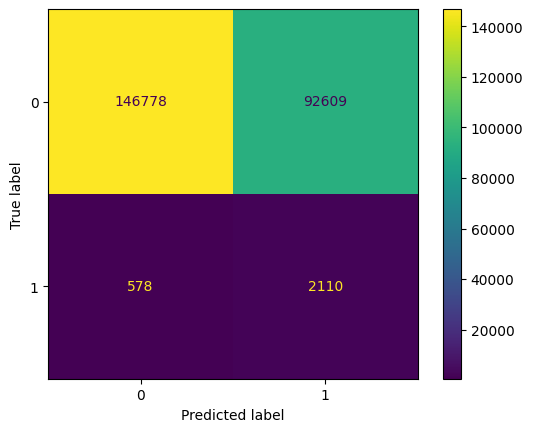

K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.9821
- F1 score: 0.9823
- Precision: 0.9740
- Recall: 0.9907
- Roc Auc Score: 0.9821
----------------------------------
Model performance for Test set
- Accuracy: 0.9566
- F1 score: 0.1207
- Precision: 0.0778
- Recall: 0.2682
- Roc Auc Score: 0.6163




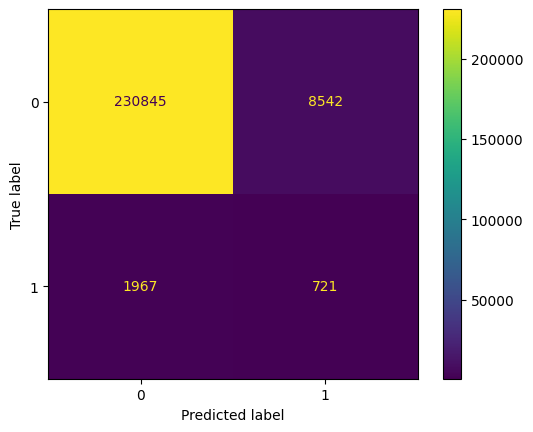

XGBClassifier
Model performance for Training set
- Accuracy: 0.9882
- F1 score: 0.9882
- Precision: 0.9894
- Recall: 0.9870
- Roc Auc Score: 0.9882
----------------------------------
Model performance for Test set
- Accuracy: 0.9817
- F1 score: 0.2441
- Precision: 0.2252
- Recall: 0.2664
- Roc Auc Score: 0.6280




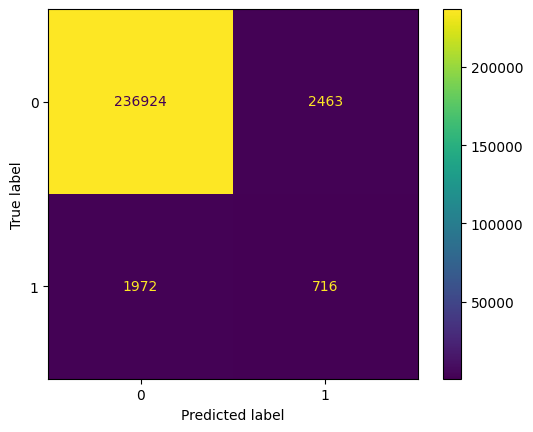

CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9953
- F1 score: 0.9953
- Precision: 0.9988
- Recall: 0.9918
- Roc Auc Score: 0.9953
----------------------------------
Model performance for Test set
- Accuracy: 0.9881
- F1 score: 0.1327
- Precision: 0.3437
- Recall: 0.0822
- Roc Auc Score: 0.5402




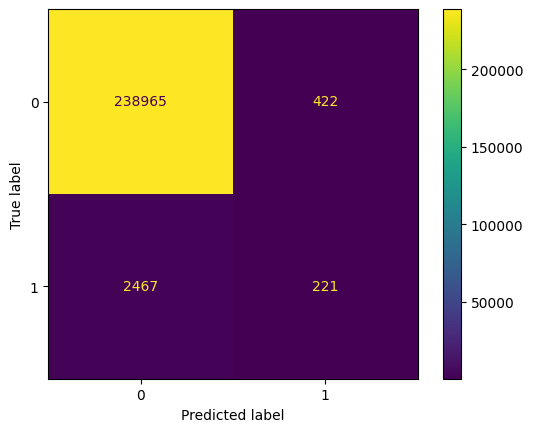

AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.9072
- F1 score: 0.9079
- Precision: 0.9009
- Recall: 0.9150
- Roc Auc Score: 0.9072
----------------------------------
Model performance for Test set
- Accuracy: 0.9062
- F1 score: 0.1471
- Precision: 0.0818
- Recall: 0.7288
- Roc Auc Score: 0.8185




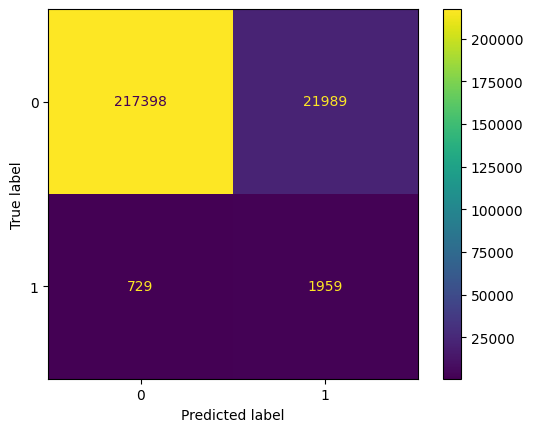

In [ ]:
from funcy import project
models_selection = project(models, 'BalancedbaggingClassifier')
BalancedBaggingClassifierModel = models['BalancedbaggingClassifier']

evaluate_models(X_train_knn_smote, Y_train_knn_smote,X_test_knn ,Y_test, models_selection)
evaluate_models(X_train_knn, Y_train ,X_test_knn ,Y_test, BalancedBaggingClassifierModel)


###Experiment: 2 = Simple Imputer with Strategy Median

In [ ]:

# Fit the Simple imputer with strategy median
median_pipeline = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('RobustScaler', RobustScaler())
])

In [ ]:
# Fit X with median_pipeline
X_train_median = median_pipeline.fit_transform(X_train)
X_test_median = median_pipeline.fit_transform(X_test)

BalancedBaggingClassifier
Model performance for Training set
- Accuracy: 0.9887
- F1 score: 0.9886
- Precision: 0.9951
- Recall: 0.9823
- Roc Auc Score: 0.9887
----------------------------------
Model performance for Test set
- Accuracy: 0.3723
- F1 score: 0.0329
- Precision: 0.0167
- Recall: 0.9606
- Roc Auc Score: 0.6631




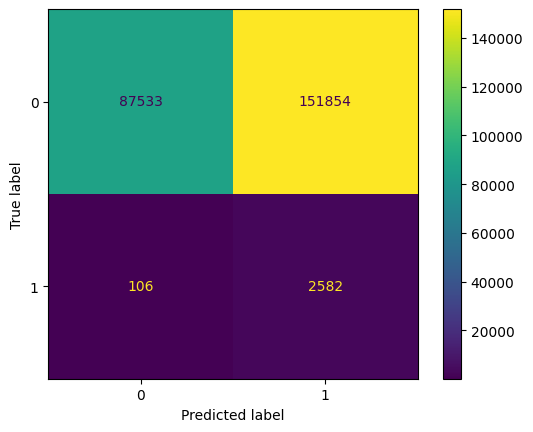

In [ ]:
cls = {"BalancedBaggingClassifier":BalancedBaggingClassifier()}
evaluate_models(X_train_median, Y_train ,X_test_median ,Y_test, cls)

In [ ]:



import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy

# Load and preprocess your dataset
# Assuming df is your DataFrame and the target column is 'target'

# df = pd.read_csv('your_dataset.csv')
# X = df.drop(columns=['target'])
# y = df['target']

# For demonstration, let's use a toy dataset
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_median, Y_train_median = smote.fit_resample(X_train_median, Y_train)

ValueError: Found input variables with inconsistent numbers of samples: [670626, 337572]

In [ ]:
unique, counts = np.unique(Y_train_median, return_counts=True)

In [ ]:
print(np.asarray((unique, counts)).T)

[[     0 335313]
 [     1 335313]]


In [ ]:
X_train_median.shape

(670626, 21)

In [ ]:
evaluate_models(X_train_median, Y_train_median ,X_test_median ,Y_test, models)

NameError: name 'models' is not defined

In [ ]:
iterative_pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('RobustScaler', RobustScaler())
])

In [ ]:
# Fit X with median_pipeline
X_train_iterative = iterative_pipeline.fit_transform(X_train)
X_test_iterative = iterative_pipeline.fit_transform(X_test)

In [ ]:




import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from tensorflow.keras.layers import Input, Dense, Lambda
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.losses import binary_crossentropy

# Load and preprocess your dataset
# Assuming df is your DataFrame and the target column is 'target'

# df = pd.read_csv('your_dataset.csv')
# X = df.drop(columns=['target'])
# y = df['target']

# For demonstration, let's use a toy dataset
from sklearn.datasets import make_classification
#X, y = make_classification(n_samples=1000, n_features=20, n_informative=2, n_redundant=10, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=1)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='minority', random_state=42)
X_train_iterative, Y_train_iterative = smote.fit_resample(X_train_iterative, Y_train)

Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9996
- Recall: 0.9958
- Roc Auc Score: 0.9977
----------------------------------
Model performance for Test set
- Accuracy: 0.9870
- F1 score: 0.2033
- Precision: 0.3156
- Recall: 0.1499
- Roc Auc Score: 0.5731




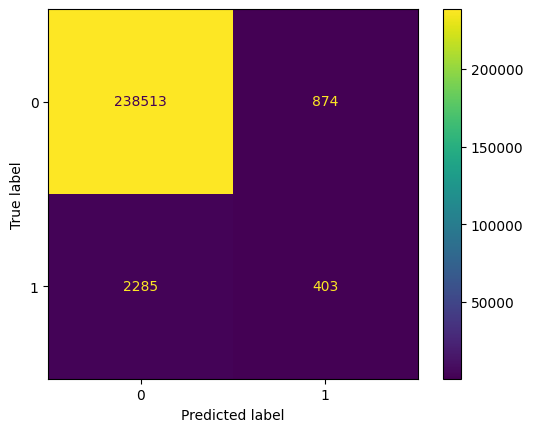

Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9996
- Recall: 0.9957
- Roc Auc Score: 0.9977
----------------------------------
Model performance for Test set
- Accuracy: 0.9499
- F1 score: 0.0793
- Precision: 0.0498
- Recall: 0.1946
- Roc Auc Score: 0.5765




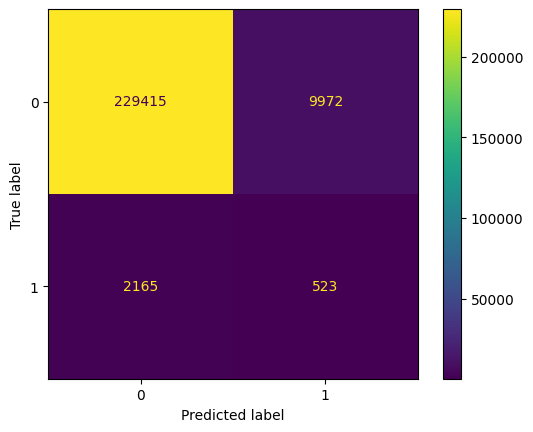

Gradient Boosting
Model performance for Training set
- Accuracy: 0.9340
- F1 score: 0.9346
- Precision: 0.9273
- Recall: 0.9419
- Roc Auc Score: 0.9340
----------------------------------
Model performance for Test set
- Accuracy: 0.9087
- F1 score: 0.1540
- Precision: 0.0859
- Recall: 0.7485
- Roc Auc Score: 0.8295




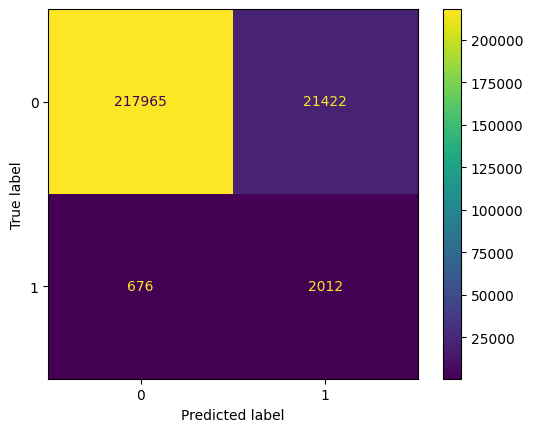

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.7339
- F1 score: 0.7557
- Precision: 0.6985
- Recall: 0.8229
- Roc Auc Score: 0.7339
----------------------------------
Model performance for Test set
- Accuracy: 0.6387
- F1 score: 0.0454
- Precision: 0.0234
- Recall: 0.7731
- Roc Auc Score: 0.7051




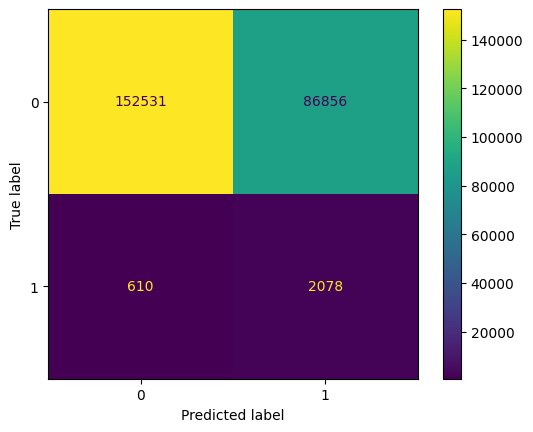

XGBClassifier
Model performance for Training set
- Accuracy: 0.9890
- F1 score: 0.9890
- Precision: 0.9900
- Recall: 0.9880
- Roc Auc Score: 0.9890
----------------------------------
Model performance for Test set
- Accuracy: 0.9140
- F1 score: 0.1225
- Precision: 0.0691
- Recall: 0.5406
- Roc Auc Score: 0.7294




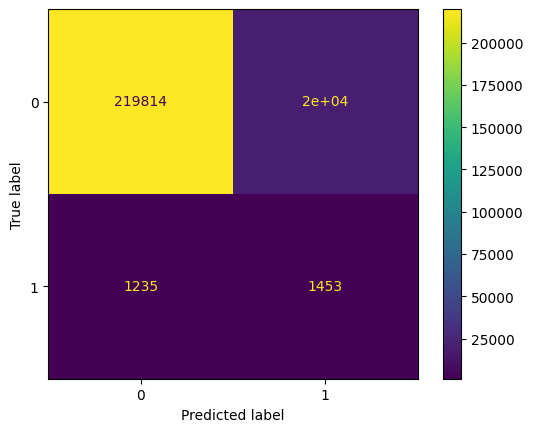

CatBoosting Classifier
Model performance for Training set
- Accuracy: 0.9953
- F1 score: 0.9953
- Precision: 0.9988
- Recall: 0.9918
- Roc Auc Score: 0.9953
----------------------------------
Model performance for Test set
- Accuracy: 0.9126
- F1 score: 0.1148
- Precision: 0.0647
- Recall: 0.5104
- Roc Auc Score: 0.7138




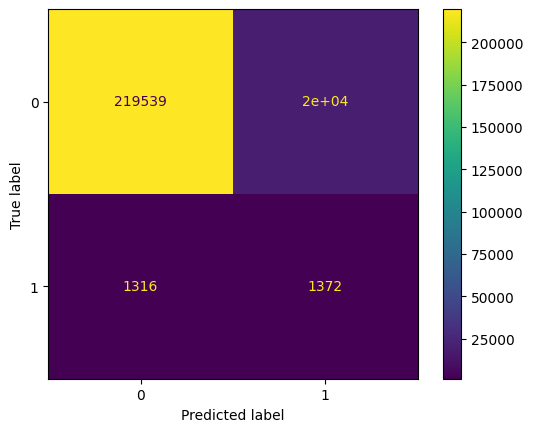

AdaBoost Classifier
Model performance for Training set
- Accuracy: 0.9046
- F1 score: 0.9056
- Precision: 0.8967
- Recall: 0.9146
- Roc Auc Score: 0.9046
----------------------------------
Model performance for Test set
- Accuracy: 0.8913
- F1 score: 0.1370
- Precision: 0.0751
- Recall: 0.7772
- Roc Auc Score: 0.8349




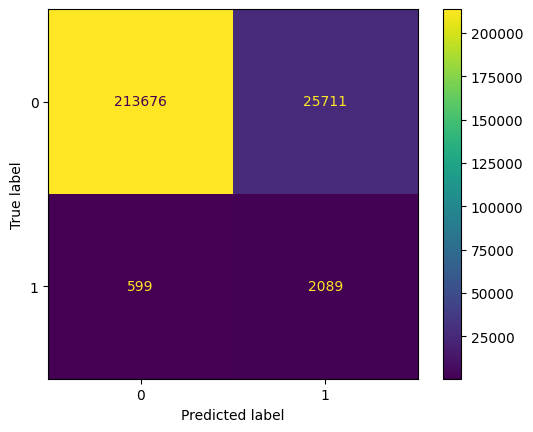

In [ ]:
evaluate_models(X_train_iterative, Y_train_iterative,X_test_iterative ,Y_test, models)

In [ ]:

#Function to perform addition of features
def add(df,num_cols):
  for i in num_cols:
    for j in num_cols:
      if (i!=j):
        df[i+'_'+j+'_add']=df[i]+df[j]
  return df

#Function to perform multiplication of features
def mult(df,num_cols):
  for i in num_cols:
    for j in num_cols:
      if (i!=j):
        df[i+'_'+j+'_mult']=df[i]*df[j]
  return df


#Function to perform inverse of features
def inv(df,num_cols):
    for i in num_cols:
      df[i+'_'+'inv']=1/(df[i]+0.001)

    return df

#Function to perform square of features
def square(df,num_cols):
  for i in num_cols:
    df[i+'_'+'square']=df[i] * df[i]
  return df

#Function to perform square root of features
def sqrt(df,num_cols):
  for i in num_cols:
    df[i+'_'+'square_root']=np.sqrt(abs(df[i]))
  return df

#Function to perform log of features
def log(df,num_cols):
  for i in num_cols:
    df[i+'_'+'log']= (np.log(abs(df[i])+1))
  return df

#Applying tranformed functions on train data and test data
def apply_transformations(X_train,X_test,numerical_features):
    X_train_iter_trans=add(X_train,numerical_features)
    X_train_iter_trans=mult(X_train,numerical_features)
    X_train_iter_trans=inv(X_train,numerical_features)
    X_train_iter_trans=square(X_train,numerical_features)
    X_train_iter_trans=sqrt(X_train,numerical_features)
    X_train_iter_trans=log(X_train,numerical_features)


    X_test_iter_trans=add(X_test,numerical_features)
    X_test_iter_trans=mult(X_test,numerical_features)
    X_test_iter_trans=inv(X_test,numerical_features)
    X_test_iter_trans=square(X_test,numerical_features)
    X_test_iter_trans=sqrt(X_test,numerical_features)
    X_test_iter_trans=log(X_test,numerical_features)
    return X_train_iter_trans,X_test_iter_trans

In [ ]:

columns = X_train.columns
X_train_knn_df = pd.DataFrame(X_train_knn,columns=columns)
X_test_knn_df  = pd.DataFrame(X_test_knn,columns=columns)

In [ ]:
X_train_trans_knn,X_test_trans_knn=apply_transformations(X_train_knn_df,X_test_knn_df,numerical_features)

Random Forest
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9995
- Recall: 0.9958
- Roc Auc Score: 0.9977
----------------------------------
Model performance for Test set
- Accuracy: 0.9871
- F1 score: 0.1934
- Precision: 0.3188
- Recall: 0.1388
- Roc Auc Score: 0.5677




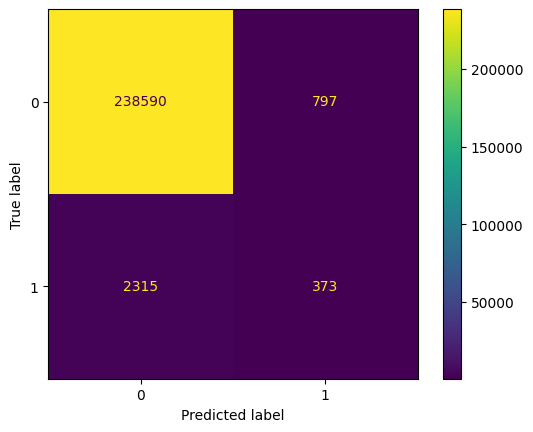

Decision Tree
Model performance for Training set
- Accuracy: 0.9977
- F1 score: 0.9977
- Precision: 0.9996
- Recall: 0.9957
- Roc Auc Score: 0.9977
----------------------------------
Model performance for Test set
- Accuracy: 0.9804
- F1 score: 0.1589
- Precision: 0.1518
- Recall: 0.1667
- Roc Auc Score: 0.5781




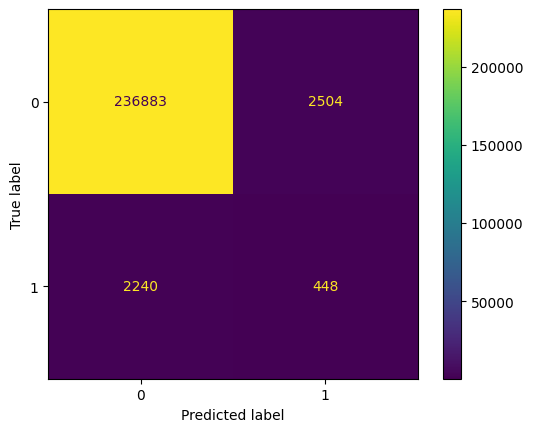

In [ ]:
evaluate_models(X_train_trans_knn, Y_train_knn,X_test_trans_knn ,Y_test, models)

In [ ]:
X_train_median_df = pd.DataFrame(X_train_median,columns=columns)
X_test_median_df  = pd.DataFrame(X_test_median,columns=columns)

In [ ]:
X_train_trans_median,X_test_trans_median=apply_transformations(X_train_knn_df,X_test_knn_df,numerical_features)

In [ ]:
evaluate_models(X_train_trans_median, Y_train,X_test_trans_median ,Y_test, models)

Random Forest
Model performance for Training set
- Accuracy: 0.9961
- F1 score: 0.9961
- Precision: 0.9969
- Recall: 0.9953
- Roc Auc Score: 0.9961
----------------------------------
Model performance for Test set
- Accuracy: 0.9008
- F1 score: 0.1514
- Precision: 0.0837
- Recall: 0.7972
- Roc Auc Score: 0.8496


Decision Tree
Model performance for Training set
- Accuracy: 0.9961
- F1 score: 0.9961
- Precision: 0.9980
- Recall: 0.9942
- Roc Auc Score: 0.9961
----------------------------------
Model performance for Test set
- Accuracy: 0.8732
- F1 score: 0.1110
- Precision: 0.0602
- Recall: 0.7132
- Roc Auc Score: 0.7941


Gradient Boosting
Model performance for Training set
- Accuracy: 0.8902
- F1 score: 0.8914
- Precision: 0.8811
- Recall: 0.9021
- Roc Auc Score: 0.8902
----------------------------------
Model performance for Test set
- Accuracy: 0.8783
- F1 score: 0.1337
- Precision: 0.0726
- Recall: 0.8456
- Roc Auc Score: 0.8622




/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression
Model performance for Training set
- Accuracy: 0.5997
- F1 score: 0.4034
- Precision: 0.7914
- Recall: 0.2707
- Roc Auc Score: 0.5997
----------------------------------
Model performance for Test set
- Accuracy: 0.9218
- F1 score: 0.0595
- Precision: 0.0343
- Recall: 0.2228
- Roc Auc Score: 0.5762


K-Neighbors Classifier
Model performance for Training set
- Accuracy: 0.8940
- F1 score: 0.8971
- Precision: 0.8712
- Recall: 0.9246
- Roc Auc Score: 0.8940
----------------------------------
Model performance for Test set
- Accuracy: 0.8229
- F1 score: 0.0869
- Precision: 0.0461
- Recall: 0.7589
- Roc Auc Score: 0.7913


XGBClassifier
Model performance for Training set
- Accuracy: 0.9789
- F1 score: 0.9790
- Precision: 0.9746
- Recall: 0.9835
- Roc Auc Score: 0.9789
----------------------------------
Model performance for Test set
- Accuracy: 0.9029
- F1 score: 0.1528
- Precision: 0.0846
- Recall: 0.7891
- Roc Auc Score: 0.8466


CatBoosting Classifier
Model performance

In [ ]:
Y_test.value_counts()

went_on_backorder
0    239387
1      2688
Name: count, dtype: int64

In [ ]:
iterative_pipeline = Pipeline(steps=[
    ('imputer', IterativeImputer()),
    ('RobustScaler', RobustScaler())
])

In [ ]:
X_train_trans_iterative = iterative_pipeline.fit_transform(X_train_iter_trans)
X_test_trans_iterative = iterative_pipeline.transform(X_test_iter_trans)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: overflow encountered in matmul
  ret = a @ b


In [ ]:
evaluate_models(X_train_trans_iterative, Y_train,X_test_trans_iterative ,Y_test, models)